In [1]:
pip install fpdf2 plotly cufflinks statsmodels scikit-learn


ERROR: Could not find a version that satisfies the requirement fpdf2 (from versions: none)
ERROR: No matching distribution found for fpdf2
Note: you may need to restart the kernel to use updated packages.


In [2]:
# === 1. Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline (should already be default in Kaggle)
%matplotlib inline

# === 2. Load Data ===
# Change the path if your file is in a different input folder
df = pd.read_csv("/kaggle/input/rec-sys/augmented_dataset_cleaned_with_id.csv")

# Quick peek
df.head()


,unique_id,name,age,gender,gain_weight,lose_weight,maintain_weight,hyper_athlete,location
0,1,Fatma,31,Female,1,0,0,0,Egypt - Giza
1,2,Racha,27,Female,0,0,1,0,Tunisia - Sousse
2,3,Ziad,58,Male,0,0,1,0,Uae - Abu Dhabi
3,4,Ibrahim,43,Male,0,0,1,0,Tunisia - Sousse
4,5,Faris,41,Male,0,1,0,0,Algeria - Constantine


In [3]:
# Shape
print("Shape of data:", df.shape)

# Data types
print("\nData types:")
print(df.dtypes)

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Descriptive statistics (numeric)
print("\nDescriptive statistics (numeric):")
print(df.describe())

# Descriptive statistics (including categorical)
print("\nDescriptive statistics (including categorical):")
print(df.describe(include='all'))


Shape of data: (4303, 9)

Data types:
unique_id           int64
name               object
age                 int64
gender             object
gain_weight         int64
lose_weight         int64
maintain_weight     int64
hyper_athlete       int64
location           object
dtype: object

Missing values per column:
unique_id          0
name               0
age                0
gender             0
gain_weight        0
lose_weight        0
maintain_weight    0
hyper_athlete      0
location           0
dtype: int64

Descriptive statistics (numeric):
         unique_id          age  gain_weight  lose_weight  maintain_weight  \
count  4303.000000  4303.000000  4303.000000  4303.000000      4303.000000   
mean   2152.000000    38.860330     0.335580     0.344876         0.327678   
std    1242.313433    12.231544     0.472248     0.475383         0.469421   
min       1.000000    18.000000     0.000000     0.000000         0.000000   
25%    1076.500000    29.000000     0.000000     0.000000  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


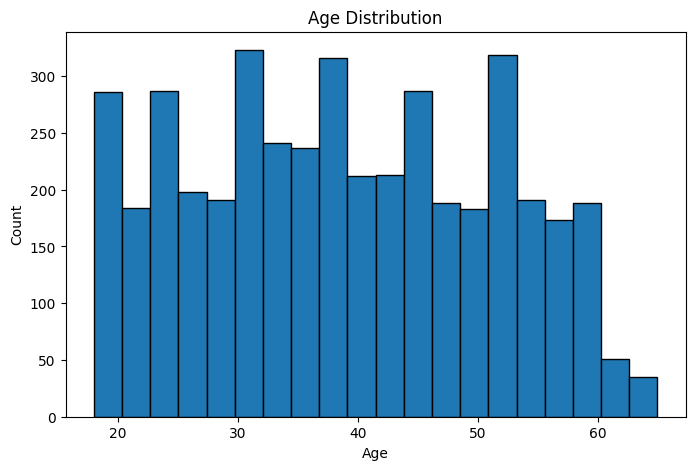

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


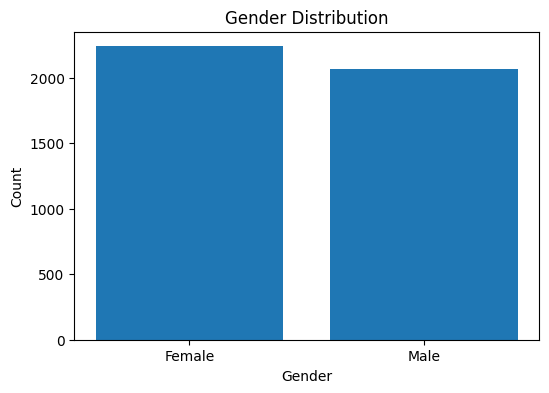

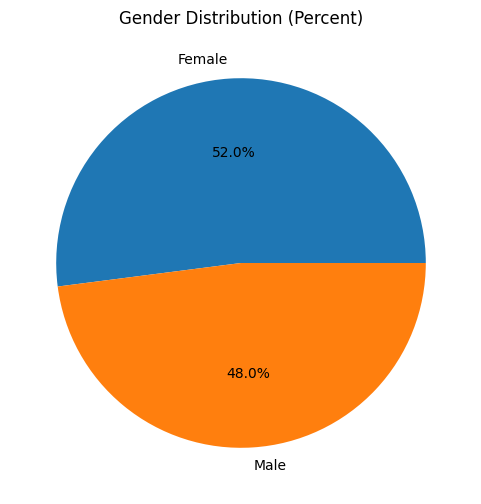

In [5]:
gender_counts = df['gender'].value_counts()

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution (Percent)")
plt.show()


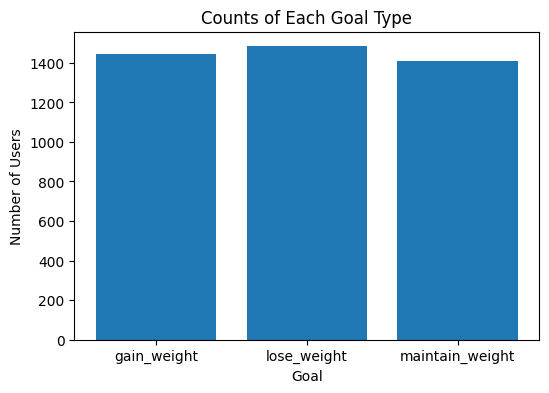

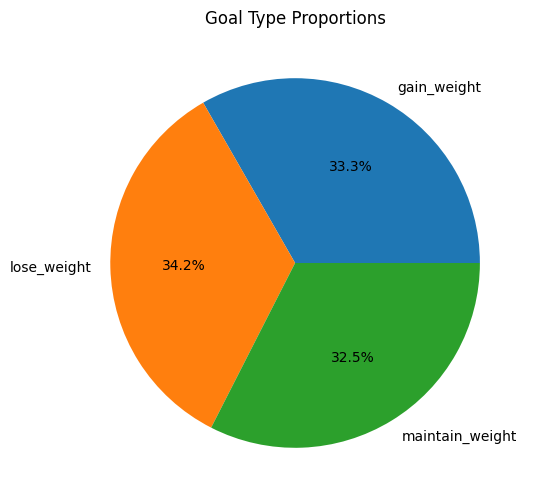

In [6]:
goal_cols = ['gain_weight', 'lose_weight', 'maintain_weight']
goal_sums = df[goal_cols].sum()

plt.figure(figsize=(6,4))
plt.bar(goal_sums.index, goal_sums.values)
plt.title("Counts of Each Goal Type")
plt.xlabel("Goal")
plt.ylabel("Number of Users")
plt.show()

# Pie
plt.figure(figsize=(6,6))
plt.pie(goal_sums.values, labels=goal_sums.index, autopct='%1.1f%%')
plt.title("Goal Type Proportions")
plt.show()


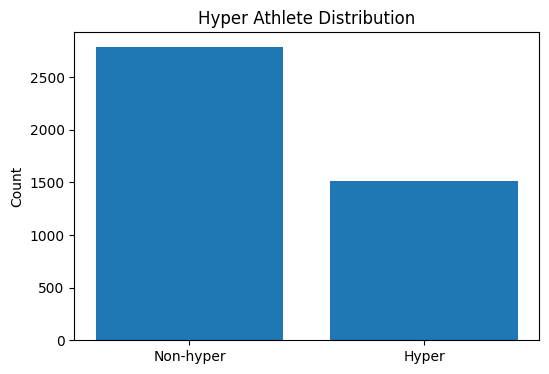

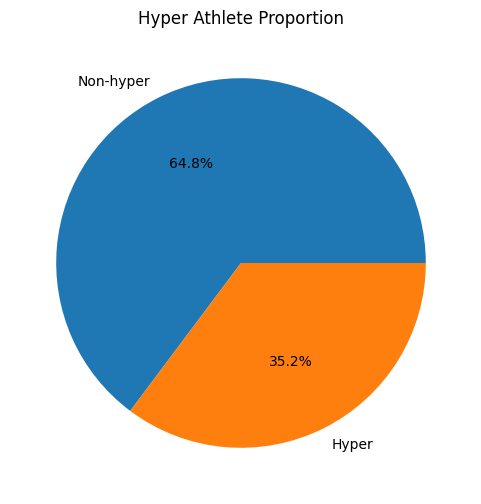

In [7]:
hyper_counts = df['hyper_athlete'].value_counts().sort_index()  # 0,1

labels = ['Non-hyper', 'Hyper']
values = [hyper_counts.get(0,0), hyper_counts.get(1,0)]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("Hyper Athlete Distribution")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Hyper Athlete Proportion")
plt.show()


Top 10 locations:
location
Egypt - Alexandria       233
Morocco - Marrakech      220
Tunisia - Sousse         212
Tunisia - Tunis          209
Tunisia - Ben Arous      208
Uae - Abu Dhabi          199
Jordan - Amman           199
Egypt - Giza             193
Algeria - Constantine    190
Saudi Arabia - Jeddah    188
Name: count, dtype: int64


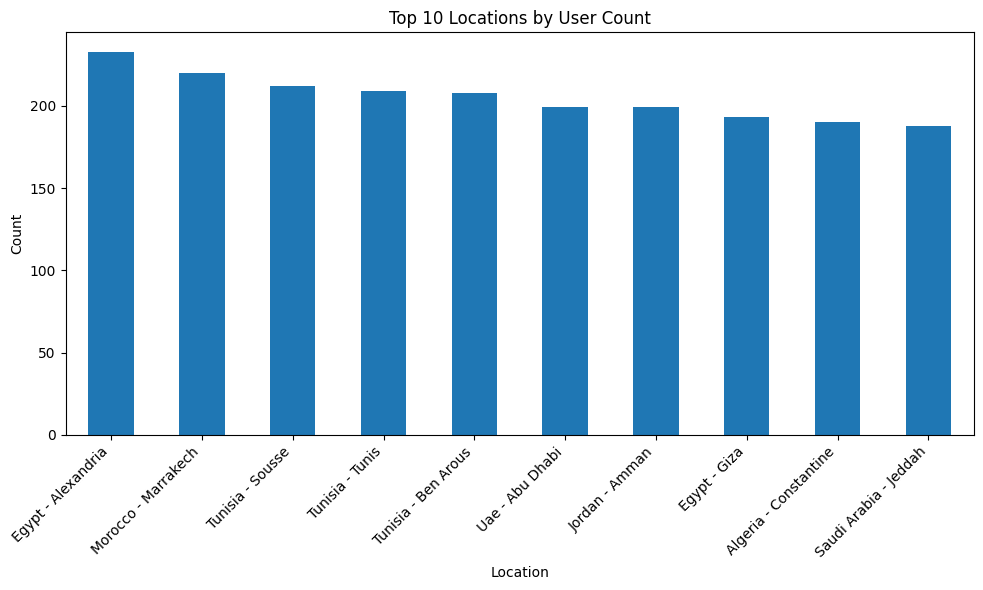

In [8]:
location_counts = df['location'].value_counts()

# Show top 10 locations
print("Top 10 locations:")
print(location_counts.head(10))

plt.figure(figsize=(10,6))
location_counts.head(10).plot(kind='bar')
plt.title("Top 10 Locations by User Count")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Average age for gain_weight=1:
38.60457063711911

Average age for lose_weight=1:
39.72911051212938

Average age for maintain_weight=1:
38.52553191489362


/tmp/ipykernel_13/2364706785.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)
/tmp/ipykernel_13/2364706785.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


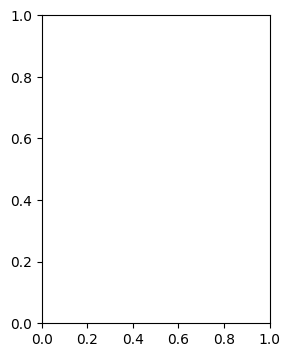

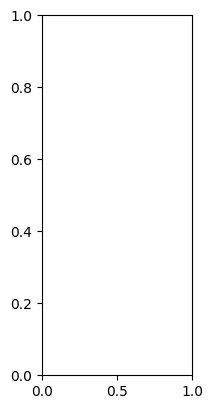

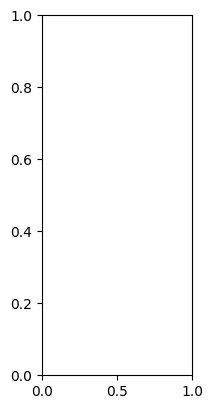

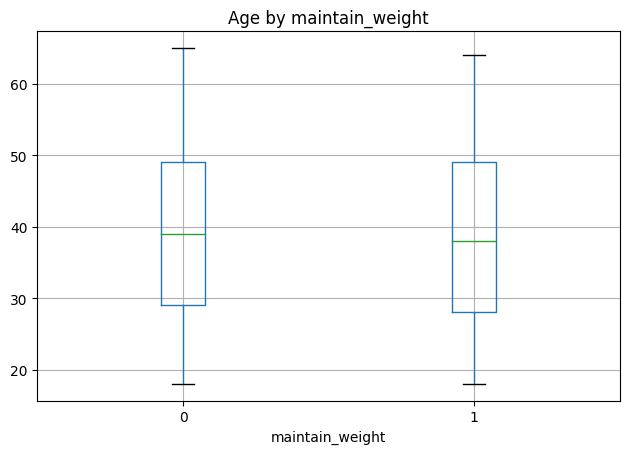

In [9]:
# Average age by goal type
for col in goal_cols:
    print(f"\nAverage age for {col}=1:")
    print(df.loc[df[col] == 1, 'age'].mean())

# Boxplots: Age vs each goal flag
plt.figure(figsize=(10,4))
for i, col in enumerate(goal_cols):
    plt.subplot(1, 3, i+1)
    df.boxplot(column='age', by=col)
    plt.title(f"Age by {col}")
    plt.suptitle("")  # remove automatic title
plt.tight_layout()
plt.show()


        gain_weight  lose_weight  maintain_weight
gender                                           
Female     0.323359     0.337204         0.351943
Male       0.348837     0.353198         0.301357


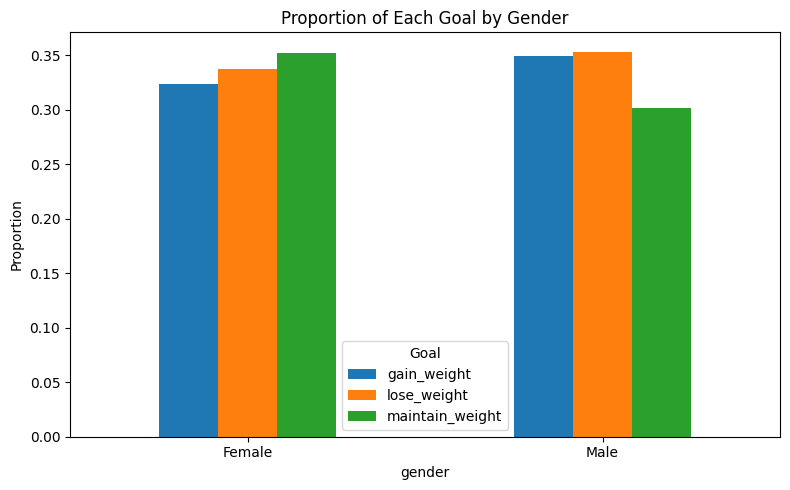

In [10]:
# Mean of goal flags by gender (proportion of each gender pursuing each goal)
goal_by_gender = df.groupby('gender')[goal_cols].mean()
print(goal_by_gender)

goal_by_gender.plot(kind='bar', figsize=(8,5))
plt.title("Proportion of Each Goal by Gender")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Goal")
plt.tight_layout()
plt.show()


gender
Female    0.350603
Male      0.354167
Name: hyper_athlete, dtype: float64


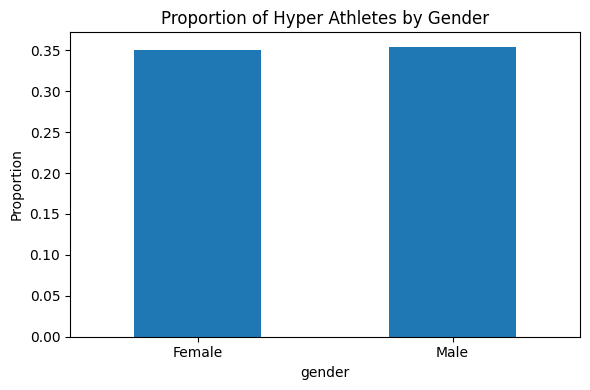

In [11]:
hyper_gender = df.groupby('gender')['hyper_athlete'].mean()
print(hyper_gender)

plt.figure(figsize=(6,4))
hyper_gender.plot(kind='bar')
plt.title("Proportion of Hyper Athletes by Gender")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_df.corr()
corr


,unique_id,age,gain_weight,lose_weight,maintain_weight,hyper_athlete
unique_id,1.000000,0.003963,0.006100,-0.018877,-0.003349,0.036989
age,0.003963,1.000000,-0.014862,0.051541,-0.019111,-0.008921
gain_weight,0.006100,-0.014862,1.000000,-0.252643,-0.300066,-0.120276
lose_weight,-0.018877,0.051541,-0.252643,1.000000,-0.239866,-0.147212
maintain_weight,-0.003349,-0.019111,-0.300066,-0.239866,1.000000,-0.128278
hyper_athlete,0.036989,-0.008921,-0.120276,-0.147212,-0.128278,1.000000


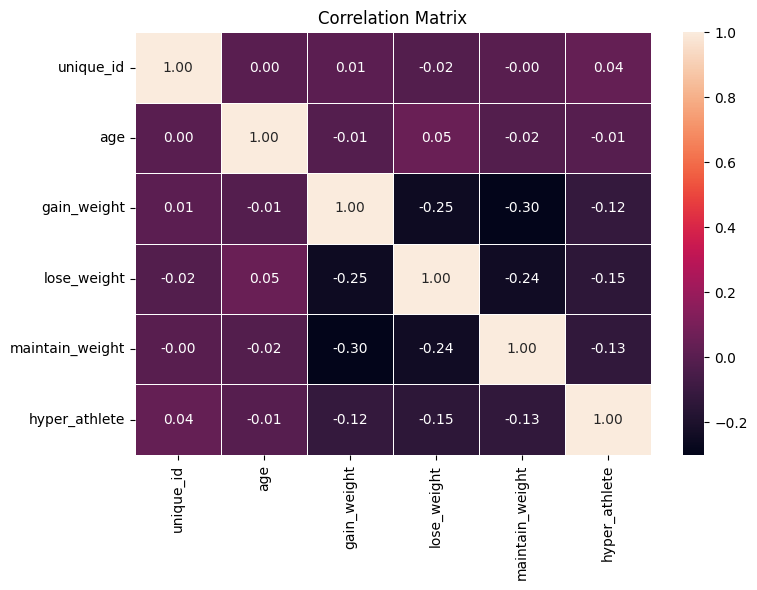

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

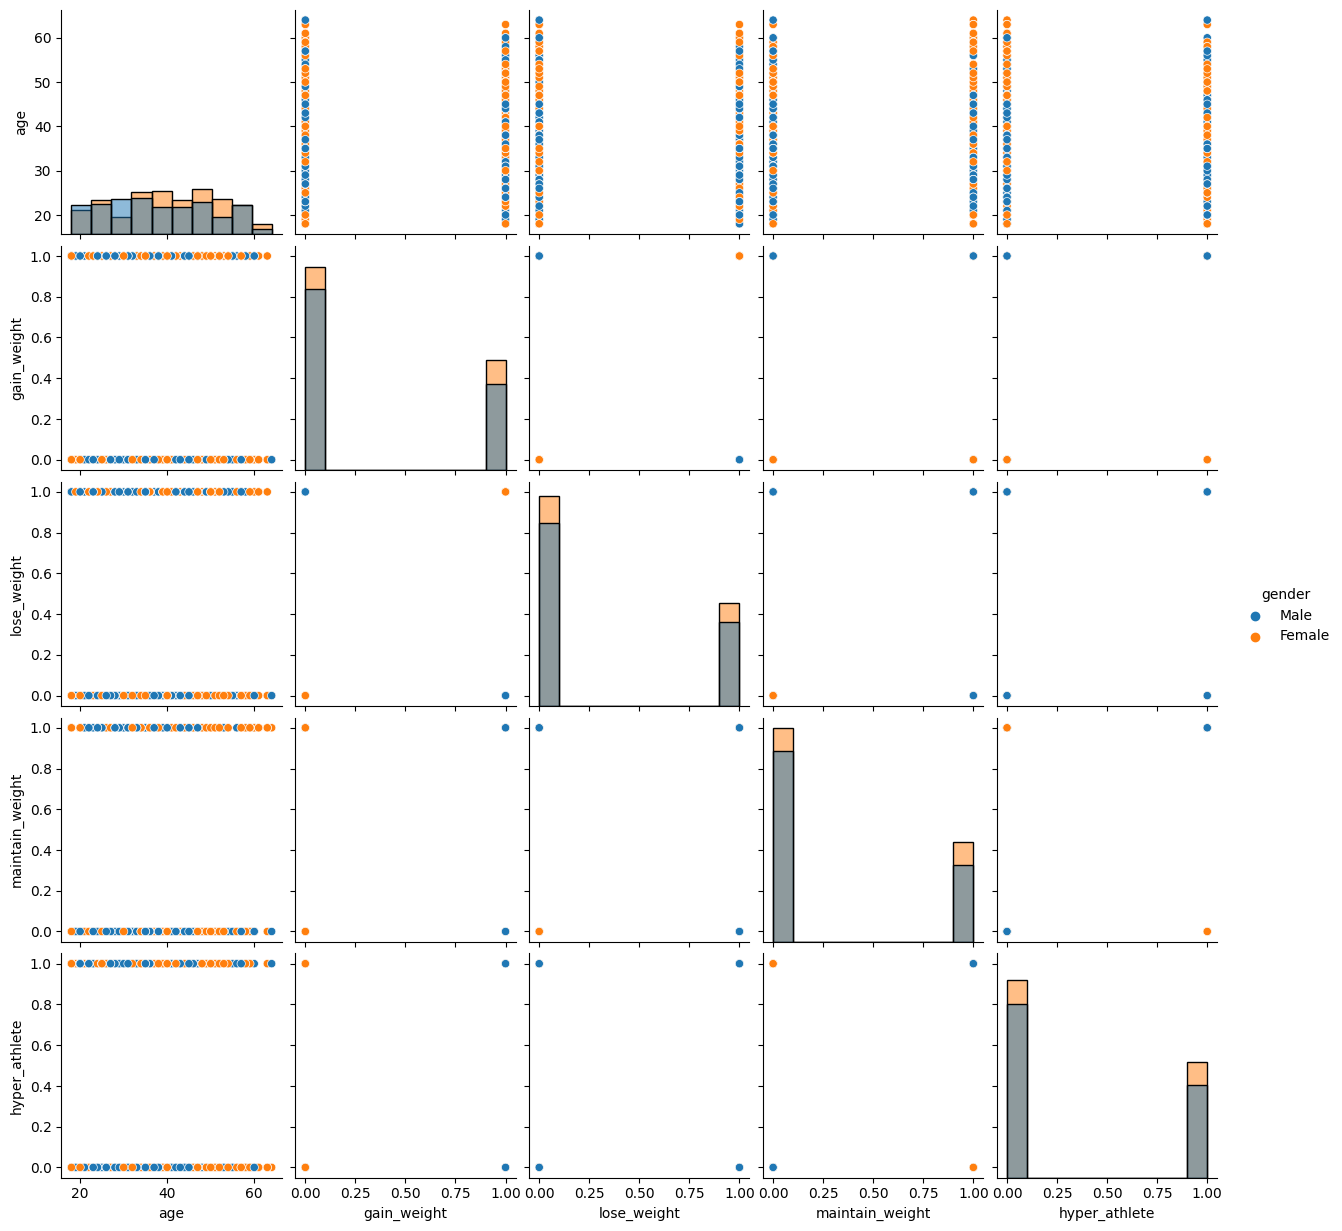

In [14]:
sample_df = df.sample(n=500, random_state=42) if len(df) > 500 else df

sns.pairplot(
    sample_df,
    vars=['age', 'gain_weight', 'lose_weight', 'maintain_weight', 'hyper_athlete'],
    hue='gender',
    diag_kind='hist'
)
plt.show()


In [15]:
# ============================================================
#  USER-TO-USER RECOMMENDATION SYSTEM
#  Based on: common interests + nearby location proximity
#  Written as if by a senior Recommendation System Engineer
# ============================================================

import os
import pandas as pd
import numpy as np

In [16]:
# ============================================================
# 0. HELPER: FIND DATASET FILE AUTOMATICALLY IN /kaggle
#    This avoids FileNotFoundError due to wrong paths.
# ============================================================

def find_dataset_path(filename="augmented_dataset_cleaned_with_id.csv"):
    """
    Search recursively under /kaggle for the given filename.
    Returns the full path if found, otherwise raises FileNotFoundError.
    """
    search_root = "/kaggle"
    for root, dirs, files in os.walk(search_root):
        if filename in files:
            full_path = os.path.join(root, filename)
            print(f"[INFO] Found dataset at: {full_path}")
            return full_path
    raise FileNotFoundError(f"Could not find '{filename}' anywhere under {search_root}. "
                            f"Check that the file is attached to the notebook.")


In [17]:
# ============================================================
# 1. LOAD DATA
# ============================================================

csv_path = find_dataset_path("augmented_dataset_cleaned_with_id.csv")
df = pd.read_csv(csv_path)

print("[INFO] Data loaded. Shape:", df.shape)
print(df.head())

[INFO] Found dataset at: /kaggle/input/rec-sys/augmented_dataset_cleaned_with_id.csv
[INFO] Data loaded. Shape: (4303, 9)
   unique_id     name  age  gender  gain_weight  lose_weight  maintain_weight  \
0          1    Fatma   31  Female            1            0                0   
1          2    Racha   27  Female            0            0                1   
2          3     Ziad   58    Male            0            0                1   
3          4  Ibrahim   43    Male            0            0                1   
4          5    Faris   41    Male            0            1                0   

   hyper_athlete               location  
0              0           Egypt - Giza  
1              0       Tunisia - Sousse  
2              0        Uae - Abu Dhabi  
3              0       Tunisia - Sousse  
4              0  Algeria - Constantine  


In [18]:
# ============================================================
# 2. PREPROCESSING
#    - Extract country & city from 'location'
#    - Create interest feature matrix
# ============================================================

# Split 'location' into 'country' and 'city'
# Example: "Tunisia - Sousse" → country="Tunisia", city="Sousse"
df[['country', 'city']] = df['location'].str.split(" - ", expand=True)

# Define interest-related columns
interest_cols = ['gain_weight', 'lose_weight', 'maintain_weight', 'hyper_athlete']

# Ensure these columns are treated as integers (0/1 flags)
df[interest_cols] = df[interest_cols].astype(int)

# Create matrix of interests for potential vector operations (not strictly required here)
interest_matrix = df[interest_cols].values



In [19]:
# ============================================================
# 3. FUNCTION: Jaccard Similarity
#    Great for binary interest vectors (0/1 indicators).
# ============================================================

def jaccard_similarity(vec1, vec2):
    """
    Compute Jaccard similarity between two binary vectors.
    Jaccard = |intersection| / |union|
    """
    vec1 = np.asarray(vec1, dtype=bool)
    vec2 = np.asarray(vec2, dtype=bool)
    
    intersection = np.logical_and(vec1, vec2).sum()
    union = np.logical_or(vec1, vec2).sum()
    
    if union == 0:
        # No interests at all → define similarity as 0
        return 0.0
    
    return intersection / union


In [20]:
# ============================================================
# 4. FUNCTION: Location Proximity Score
#    - Same city  → 1.0
#    - Same country, different city → 0.5
#    - Different country → 0.0
# ============================================================

def location_score(user_row, other_row):
    """
    Compute a simple geographic proximity score.
    Assumes 'country' and 'city' columns exist in both rows.
    """
    if user_row['country'] == other_row['country']:
        if user_row['city'] == other_row['city']:
            return 1.0    # Same city — strongest proximity
        return 0.5        # Same country, different city — moderate proximity
    return 0.0            # Different country — no proximity bonus



In [21]:
# ============================================================
# 5. MAIN RECOMMENDER FUNCTION
#    Combines:
#      - Jaccard interests similarity (70% weight)
#      - Location proximity score (30% weight)
# ============================================================

def recommend_users(target_id, top_k=5):
    """
    Recommend similar users to the user with unique_id == target_id.
    Similarity is based on:
      - Common interests (Jaccard similarity on interest flags)
      - Nearby location (same city/country)
    
    Returns a list of tuples:
      (other_user_id, other_user_name, final_score)
    """
    # Safety check: ensure the user exists
    if target_id not in df['unique_id'].values:
        raise ValueError(f"User with unique_id={target_id} does not exist in the dataset.")
    
    # Extract target user row
    user = df[df['unique_id'] == target_id].iloc[0]
    user_vec = user[interest_cols].values
    
    similarities = []

    # Iterate over all other users to compute similarity
    for idx, other in df.iterrows():
        if other['unique_id'] == target_id:
            # Skip self
            continue
        
        # Interest-based similarity (0 to 1)
        interest_sim = jaccard_similarity(user_vec, other[interest_cols].values)
        
        # Location-based similarity (0, 0.5, or 1)
        loc_sim = location_score(user, other)
        
        # Weighted combination
        final_score = (interest_sim * 0.7) + (loc_sim * 0.3)
        
        similarities.append((other['unique_id'], other['name'], final_score))
    
    # Sort users descending by final_score
    similarities = sorted(similarities, key=lambda x: x[2], reverse=True)

    # Take top K
    return similarities[:top_k]

In [22]:
# ============================================================
# 6. TEST THE RECOMMENDER
# ============================================================

# Choose any valid unique_id from your dataset
# For example, if IDs go from 1 to 4303, you can test with 10:
target_user_id = 10  

recommendations = recommend_users(target_user_id, top_k=5)

print(f"\n[RESULT] Recommended matches for user_id={target_user_id}:")
for uid, name, score in recommendations:
    print(f"  -> User ID: {uid}, Name: {name}, Similarity Score: {score:.3f}")



[RESULT] Recommended matches for user_id=10:
  -> User ID: 238, Name: Lina, Similarity Score: 1.000
  -> User ID: 510, Name: Mariam, Similarity Score: 1.000
  -> User ID: 521, Name: Moussa, Similarity Score: 1.000
  -> User ID: 939, Name: Ahmed, Similarity Score: 1.000
  -> User ID: 1190, Name: Ahmed, Similarity Score: 1.000
